# Projectile Trajectories for Different Shapes

This notebook demonstrates how air resistance affects the trajectory of projectiles with different shapes. We'll launch various objects at the same initial speed and angle to see how their drag coefficients influence their flight paths.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ballistics_lib import projectile_distance3

# Configure matplotlib for better plots
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

## Launch Parameters

All projectiles will be launched with identical initial conditions to isolate the effect of shape on trajectory.

In [2]:
# =============================================================================
# LAUNCH PARAMETERS - Clearly defined for easy modification
# =============================================================================

LAUNCH_SPEED = 100.0  # Initial velocity in m/s
LAUNCH_ANGLE = 45.0  # Launch angle in degrees
PROJECTILE_MASS = 5.0  # Mass in kg (same for all shapes)
SURFACE_AREA = 0.05  # Cross-sectional area in m² (same for all shapes)

# Display the parameters clearly
print("=" * 50)
print("PROJECTILE LAUNCH PARAMETERS")
print("=" * 50)
print(f"Initial Speed:    {LAUNCH_SPEED:.1f} m/s")
print(f"Launch Angle:     {LAUNCH_ANGLE:.1f}°")
print(f"Projectile Mass:  {PROJECTILE_MASS:.1f} kg")
print(f"Surface Area:     {SURFACE_AREA:.3f} m²")
print("=" * 50)

PROJECTILE LAUNCH PARAMETERS
Initial Speed:    100.0 m/s
Launch Angle:     45.0°
Projectile Mass:  5.0 kg
Surface Area:     0.050 m²


## Shape Definitions

Different shapes have different drag coefficients, which significantly affect their aerodynamic properties.

In [3]:
# Define the shapes we want to compare
shapes_to_plot = [
    "sphere",  # Cd = 0.47 (sports ball)
    "streamlined",  # Cd = 0.04 (aerodynamic shape)
    "cylinder_end",  # Cd = 0.8  (bullet-like)
    "cube",  # Cd = 1.05 (worst aerodynamics)
    "flat_plate",  # Cd = 1.28 (very poor aerodynamics)
]

# Color scheme for the plots
colors = ["blue", "green", "orange", "red", "purple"]

# Display drag coefficients
drag_coefficients = {
    "sphere": 0.47,
    "streamlined": 0.04,
    "cylinder_end": 0.8,
    "cube": 1.05,
    "flat_plate": 1.28,
}

print("\nSHAPE DRAG COEFFICIENTS:")
print("-" * 30)
for shape in shapes_to_plot:
    cd = drag_coefficients[shape]
    print(f"{shape:15}: Cd = {cd:.2f}")


SHAPE DRAG COEFFICIENTS:
------------------------------
sphere         : Cd = 0.47
streamlined    : Cd = 0.04
cylinder_end   : Cd = 0.80
cube           : Cd = 1.05
flat_plate     : Cd = 1.28


## Calculate Trajectories

Now we'll calculate the complete trajectory for each shape using our enhanced ballistics library.

In [4]:
# Calculate trajectories for all shapes
trajectories = {}
distances = {}

print("Calculating trajectories...\n")

for shape in shapes_to_plot:
    # Get trajectory data with 200 points for smooth plotting
    trajectory = projectile_distance3(
        speed=LAUNCH_SPEED,
        angle_deg=LAUNCH_ANGLE,
        mass=PROJECTILE_MASS,
        surface_area=SURFACE_AREA,
        shape=shape,
        return_trajectory=True,
        n_points=200,
    )

    trajectories[shape] = trajectory
    distances[shape] = trajectory["distance"]

    # Display results
    print(
        f"{shape:15}: Distance = {trajectory['distance']:6.1f} m, "
        f"Flight time = {trajectory['t'][-1]:5.2f} s, "
        f"Max height = {max(trajectory['y']):5.1f} m"
    )

# Calculate vacuum trajectory for comparison
import math

angle_rad = math.radians(LAUNCH_ANGLE)
vacuum_distance = LAUNCH_SPEED**2 * math.sin(2 * angle_rad) / 9.81
vacuum_time = 2 * LAUNCH_SPEED * math.sin(angle_rad) / 9.81
vacuum_height = (LAUNCH_SPEED * math.sin(angle_rad)) ** 2 / (2 * 9.81)

print(
    f"\n{'Vacuum (no air)':15}: Distance = {vacuum_distance:6.1f} m, "
    f"Flight time = {vacuum_time:5.2f} s, "
    f"Max height = {vacuum_height:5.1f} m"
)

Calculating trajectories...

sphere         : Distance =  360.3 m, Flight time = 10.25 s, Max height = 131.4 m
streamlined    : Distance =  857.6 m, Flight time = 13.73 s, Max height = 231.5 m
cylinder_end   : Distance =  261.1 m, Flight time =  9.06 s, Max height = 103.5 m
cube           : Distance =  218.3 m, Flight time =  8.44 s, Max height =  90.1 m
flat_plate     : Distance =  190.6 m, Flight time =  7.99 s, Max height =  81.0 m

Vacuum (no air): Distance = 1019.4 m, Flight time = 14.42 s, Max height = 254.8 m


## Trajectory Comparison Plot

Let's visualize how different shapes affect the projectile trajectory.

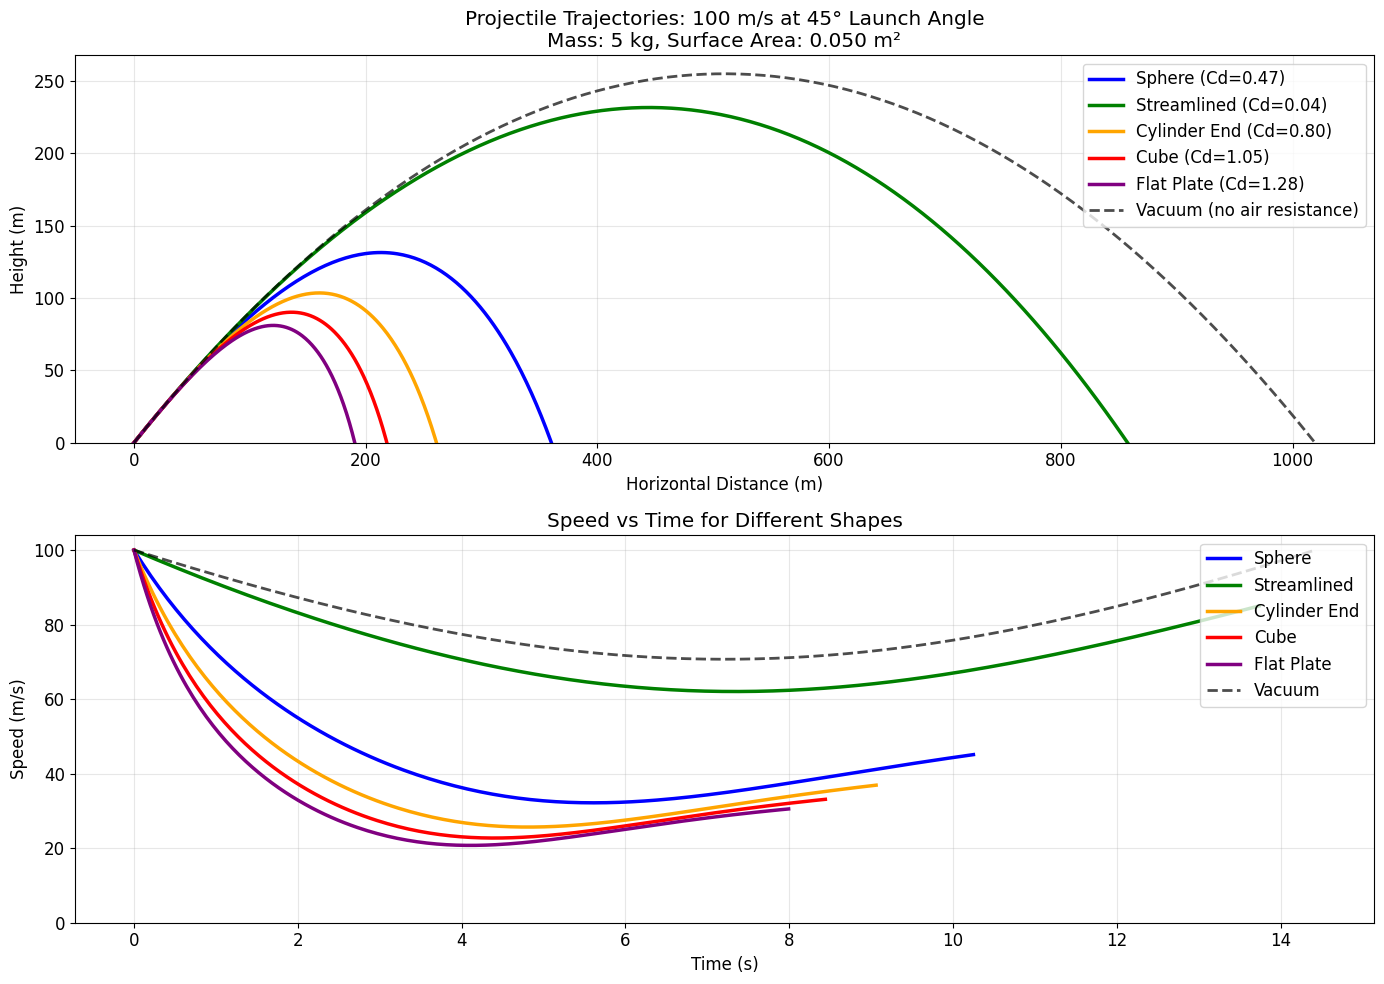

In [5]:
# Create the main trajectory plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Full trajectories
for i, shape in enumerate(shapes_to_plot):
    traj = trajectories[shape]
    ax1.plot(
        traj["x"],
        traj["y"],
        color=colors[i],
        linewidth=2.5,
        label=f"{shape.replace('_', ' ').title()} (Cd={drag_coefficients[shape]:.2f})",
    )

# Add vacuum trajectory for reference
t_vacuum = np.linspace(0, vacuum_time, 200)
x_vacuum = LAUNCH_SPEED * math.cos(angle_rad) * t_vacuum
y_vacuum = LAUNCH_SPEED * math.sin(angle_rad) * t_vacuum - 0.5 * 9.81 * t_vacuum**2
ax1.plot(
    x_vacuum,
    y_vacuum,
    "k--",
    linewidth=2,
    alpha=0.7,
    label="Vacuum (no air resistance)",
)

ax1.set_xlabel("Horizontal Distance (m)")
ax1.set_ylabel("Height (m)")
ax1.set_title(
    f"Projectile Trajectories: {LAUNCH_SPEED:.0f} m/s at {LAUNCH_ANGLE:.0f}° Launch Angle\n"
    f"Mass: {PROJECTILE_MASS:.0f} kg, Surface Area: {SURFACE_AREA:.3f} m²"
)
ax1.grid(True, alpha=0.3)
ax1.legend(loc="upper right")
ax1.set_ylim(bottom=0)

# Plot 2: Speed vs time
for i, shape in enumerate(shapes_to_plot):
    traj = trajectories[shape]
    ax2.plot(
        traj["t"],
        traj["speed"],
        color=colors[i],
        linewidth=2.5,
        label=f"{shape.replace('_', ' ').title()}",
    )

# Add vacuum speed for reference (constant horizontal, changing vertical)
v_vacuum = np.sqrt(
    (LAUNCH_SPEED * math.cos(angle_rad)) ** 2
    + (LAUNCH_SPEED * math.sin(angle_rad) - 9.81 * t_vacuum) ** 2
)
ax2.plot(t_vacuum, v_vacuum, "k--", linewidth=2, alpha=0.7, label="Vacuum")

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Speed (m/s)")
ax2.set_title("Speed vs Time for Different Shapes")
ax2.grid(True, alpha=0.3)
ax2.legend(loc="upper right")
ax2.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

## Distance Comparison

Let's create a bar chart to clearly show the range differences.

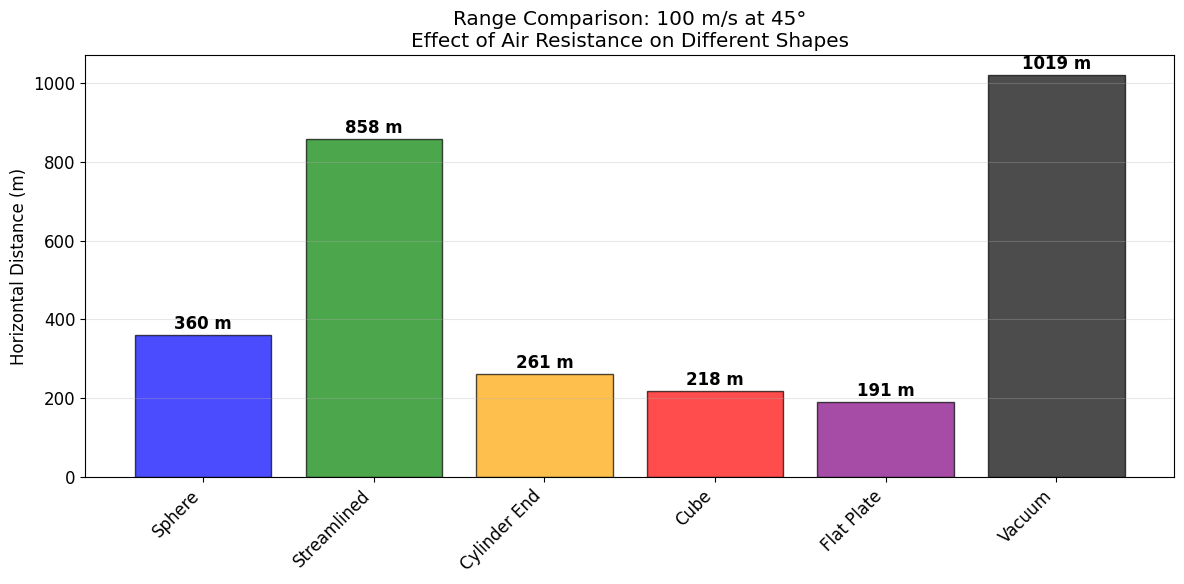


RANGE REDUCTION DUE TO AIR RESISTANCE:
Sphere         :  64.7% reduction
Streamlined    :  15.9% reduction
Cylinder End   :  74.4% reduction
Cube           :  78.6% reduction
Flat Plate     :  81.3% reduction


In [6]:
# Create bar chart of distances
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for plotting
shape_names = [shape.replace("_", " ").title() for shape in shapes_to_plot]
shape_distances = [distances[shape] for shape in shapes_to_plot]

# Add vacuum distance
shape_names.append("Vacuum")
shape_distances.append(vacuum_distance)
all_colors = colors + ["black"]

# Create bar chart
bars = ax.bar(
    shape_names, shape_distances, color=all_colors, alpha=0.7, edgecolor="black"
)

# Add value labels on bars
for bar, distance in zip(bars, shape_distances):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 5,
        f"{distance:.0f} m",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

ax.set_ylabel("Horizontal Distance (m)")
ax.set_title(
    f"Range Comparison: {LAUNCH_SPEED:.0f} m/s at {LAUNCH_ANGLE:.0f}°\n"
    f"Effect of Air Resistance on Different Shapes"
)
ax.grid(True, alpha=0.3, axis="y")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Calculate percentage reductions from vacuum
print("\nRANGE REDUCTION DUE TO AIR RESISTANCE:")
print("=" * 45)
for shape in shapes_to_plot:
    reduction = (1 - distances[shape] / vacuum_distance) * 100
    print(f"{shape.replace('_', ' ').title():15}: {reduction:5.1f}% reduction")

## Key Observations

From these simulations, we can observe several important aerodynamic principles:

1. **Drag coefficient matters enormously**: The streamlined shape travels much farther than the flat plate
2. **Air resistance reduces both range and speed**: All shapes fall short of the vacuum trajectory
3. **Speed decreases continuously**: Unlike vacuum, where horizontal speed remains constant
4. **Shape optimization is crucial**: A 25x difference in drag coefficient (0.04 vs 1.28) can dramatically affect performance

## Experiment with Different Parameters

Try modifying the launch parameters at the top of this notebook to see how different speeds and angles affect the relative performance of different shapes!